<a href="https://colab.research.google.com/github/carlosfreires/pred_prec_mobile/blob/main/pred_prec_mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando o drive para carregar o dataSet

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importando o Pandas e Numpy

In [12]:
import pandas as pd
import numpy as np

importando o dataset

In [13]:
df = pd.read_csv('/content/drive/MyDrive/dataSet/dataSetMobilePrice/train.csv')
display(df.head(4))


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [14]:
entradas = df.iloc[:,:20]
entradas.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [15]:
target = df.iloc[:,20]
target.head()
target.groupby(target).count()

,price_range
price_range,
0,500
1,500
2,500
3,500


Importando o modulo para separação dos dados em teste e treino da lib skalearn

In [16]:
from sklearn.model_selection import train_test_split

Seprarando os dados em teste e treino

In [17]:
  entrada_train, entrada_teste, target_train, target_teste = train_test_split(entradas,target,test_size=0.3)
  print(entrada_train.shape)
  print(entrada_teste.shape)
  print(target_train.shape)
  print(target_teste.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


Criação de trainamento e modelo

importando o modulo layers e models da API keras no tensorflow e também o modulo pyplot da lib matplotlib

In [18]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import model_from_json, Model
import matplotlib.pyplot as plt

criando a função para criar modelo

In [19]:
def criar_modelo():
  entrada = Input(shape=(20,),name='camada_entrada')
  i = Dense(20,activation='relu',name='camada_oculta_1')(entrada)
  i = Dense(10,activation='relu',name='camada_oculta_2')(i)
  i = Dense(5,activation='relu',name='camada_oculta_3')(i)
  saida = Dense(4,activation='softmax',name='camada_saida')(i)
  modelo = Model(inputs=entrada,outputs=saida)
  return modelo

In [20]:
modelo_1 = criar_modelo()

In [21]:
modelo_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ camada_entrada (InputLayer)     │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ camada_oculta_1 (Dense)         │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ camada_oculta_2 (Dense)         │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ camada_oculta_3 (Dense)         │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ camada_saida (Dense)            │ (None, 4)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 709 (2.77 KB)

 Trainable params: 709 (2.77 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
modelo_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
history_modelo_1 = modelo_1.fit(entrada_train,target_train,epochs=100,validation_data=(entrada_teste,target_teste))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2386 - loss: 248.9932 - val_accuracy: 0.2367 - val_loss: 21.4648
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2109 - loss: 13.6333 - val_accuracy: 0.1850 - val_loss: 4.8010
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2073 - loss: 3.3140 - val_accuracy: 0.2700 - val_loss: 2.6128
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2786 - loss: 2.1177 - val_accuracy: 0.2750 - val_loss: 2.1414
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2765 - loss: 1.8060 - val_accuracy: 0.2767 - val_loss: 1.8781
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2860 - loss: 1.6449 - val_accuracy: 0.2717 - val_loss: 1.6803
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2928 - loss: 1.5783 - val_accuracy: 0.2700 - val_loss: 1.6059
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2904 - loss: 1.6024 - val_accuracy: 0.275

In [25]:
# grafico de vizualização dos dados

In [26]:
def plot_history(obj_model):
  plt.plot(obj_model.history['accuracy'])
  plt.plot(obj_model.history['val_accuracy'])
  plt.title('Acuracia do modelo')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  plt.plot(obj_model.history['loss'])
  plt.plot(obj_model.history['val_loss'])
  plt.title('Perdas do modelo')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

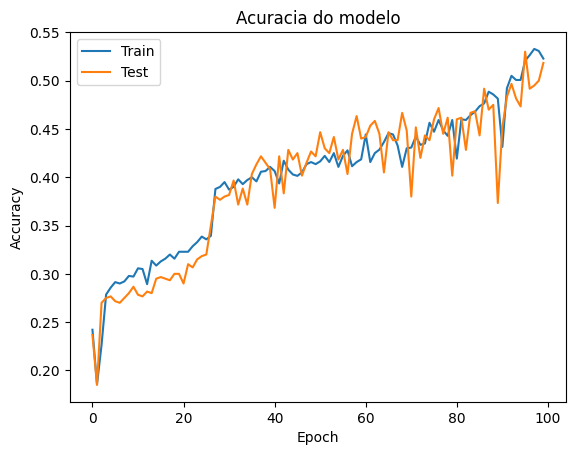

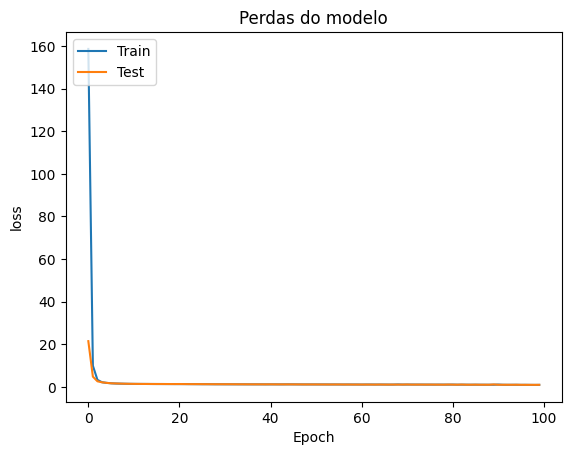

In [27]:
plot_history(history_modelo_1)

Havaliação do modelo e predições

In [28]:
modelo_1.evaluate(entrada_teste,target_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - loss: 0.9401 


[0.9646469354629517, 0.5183333158493042]

In [29]:
predicao = modelo_1.predict(entrada_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [30]:
target_teste.head(10)

,price_range
1276,2
478,3
1007,1
1619,2
187,3
971,0
1990,0
1924,1
322,3
1620,2


In [31]:
predicao[target_teste == 2]

array([[6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [4.0408945e-01, 5.9339833e-01, 2.5121465e-03, 4.5548148e-08],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-01, 3.5658064e-01, 3.8414040e-01],
       [6.6988856e-02, 1.9229014e-

In [32]:
pred = predicao.copy()
pred1 = np.rint(predicao)
pred1[target_teste == 2]

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


contar quantidade de vezes que a previsão foi correta

1.   Item da lista
2.   Item da lista



In [33]:
# prompt:  contar quantidade de vezes que a previsão foi correta e quantas vezes foi errada

from sklearn.metrics import accuracy_score

# Convert predictions to class labels
predicted_labels = np.argmax(predicao, axis=1)

# Calculate accuracy
accuracy = accuracy_score(target_teste, predicted_labels)


# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == target_teste)
incorrect_predictions = len(target_teste) - correct_predictions

print(f"Accuracy: {accuracy}")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


Accuracy: 0.5183333333333333
Correct predictions: 311
Incorrect predictions: 289


Transformação de dados para o modelo

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
t = MinMaxScaler()
t.fit(entradas)


MinMaxScaler()

In [40]:
entrada_train_escala = t.transform(entrada_train)
entrada_teste_escala = t.transform(entrada_teste)

In [44]:
entrada_teste_escala

array([[0.05678023, 0.        , 0.36      , ..., 1.        , 0.        ,
        1.        ],
       [0.74415498, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.97661991, 1.        , 0.2       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.99532398, 0.        , 0.92      , ..., 1.        , 1.        ,
        1.        ],
       [0.14428858, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11422846, 1.        , 0.04      , ..., 1.        , 0.        ,
        1.        ]])

In [45]:
modelo_2 = criar_modelo()
modelo_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
history_modelo_2 = modelo_2.fit(entrada_train_escala,target_train,epochs=500,validation_data=(entrada_teste_escala,target_teste))

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2166 - loss: 1.4317 - val_accuracy: 0.2517 - val_loss: 1.3972
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2451 - loss: 1.3936 - val_accuracy: 0.2383 - val_loss: 1.3897
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2736 - loss: 1.3852 - val_accuracy: 0.2750 - val_loss: 1.3825
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2641 - loss: 1.3759 - val_accuracy: 0.2833 - val_loss: 1.3700
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2964 - loss: 1.3628 - val_accuracy: 0.2767 - val_loss: 1.3472
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3203 - loss: 1.3328 - val_accuracy: 0.4067 - val_loss: 1.2968
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3823 - loss: 1.2820 - val_accuracy: 0.4717 - val_loss: 1.2131
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4898 - loss: 1.1795 - val_accuracy: 0.5550 - v

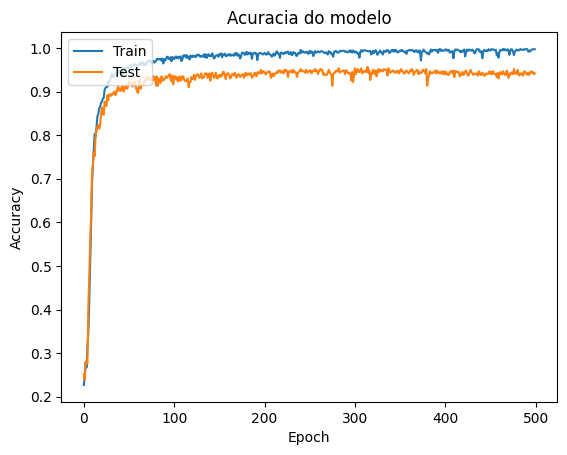

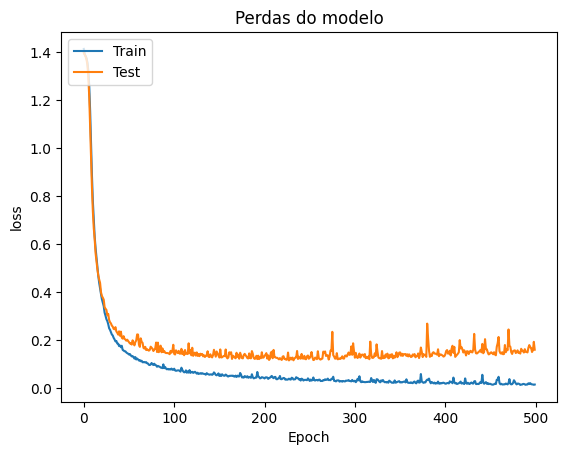

In [47]:
plot_history(history_modelo_2)

In [50]:
modelo_2.evaluate(entrada_teste_escala,target_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9514 - loss: 0.1340 


[0.1594260185956955, 0.9416666626930237]

In [52]:
predicao_modelo_2 = modelo_2.predict(entrada_teste_escala)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [54]:
from sklearn.metrics import accuracy_score

# Convert predictions to class labels
predicted_labels = np.argmax(predicao_modelo_2, axis=1)

# Calculate accuracy
accuracy_modelo_2 = accuracy_score(target_teste, predicted_labels)


# Compare predicted labels with true labels
correct_predictions_modelo_2 = np.sum(predicted_labels == target_teste)
incorrect_predictions_modelo_2 = len(target_teste) - correct_predictions

print(f"Accuracy: {accuracy_modelo_2}")
print(f"Correct predictions: {correct_predictions_modelo_2}")
print(f"Incorrect predictions: {incorrect_predictions_modelo_2}")

Accuracy: 0.9416666666666667
Correct predictions: 565
Incorrect predictions: 289


In [55]:
dicionario_resultados = {'Modelo 2': [incorrect_predictions_modelo_2,correct_predictions_modelo_2,accuracy_modelo_2],
                         'Modelo 1':[incorrect_predictions, correct_predictions,accuracy]}

In [56]:
df_comparando_modelos = pd.DataFrame(dicionario_resultados,index=['Erros','Acertos','Acuracia'])

In [57]:
df_comparando_modelos

,Modelo 2,Modelo 1
Erros,289.000000,289.000000
Acertos,565.000000,311.000000
Acuracia,0.941667,0.518333


<Axes: >

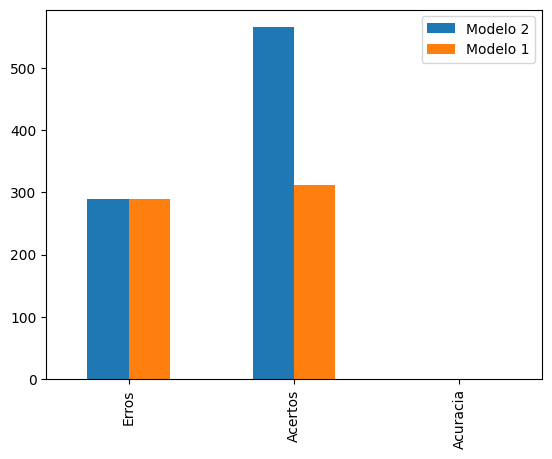

In [62]:
df_comparando_modelos.plot.bar()


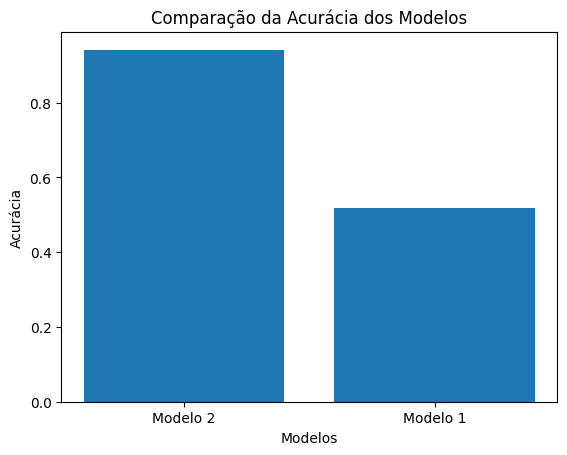

In [63]:
plt.bar(df_comparando_modelos.columns, df_comparando_modelos.loc['Acuracia'])
plt.title('Comparação da Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelos')
plt.show()

Teste de Modelo com Dados não utilizados

In [64]:
entrada_train_val, entrada_teste = train_test_split(entradas,test_size=0.3, random_state=42)
target_train_val, target_teste = train_test_split(target,test_size=0.3, random_state=42)

In [65]:
entrada_train, entrada_val = train_test_split(entrada_train_val,test_size=0.3, random_state=42)
target_train, target_val = train_test_split(target_train_val,test_size=0.3, random_state=42)

In [68]:
modelo_3 = criar_modelo()
modelo_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [69]:
history_modelo_3 = modelo_3.fit(entrada_train,target_train,epochs=300,validation_data=(entrada_val,target_val))

Epoch 1/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2401 - loss: 193.3303 - val_accuracy: 0.2190 - val_loss: 93.1033
Epoch 2/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2144 - loss: 77.8631 - val_accuracy: 0.2214 - val_loss: 41.5765
Epoch 3/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2418 - loss: 32.2539 - val_accuracy: 0.3881 - val_loss: 13.0081
Epoch 4/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3648 - loss: 12.1721 - val_accuracy: 0.3762 - val_loss: 5.7385
Epoch 5/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4079 - loss: 6.1204 - val_accuracy: 0.4643 - val_loss: 3.2818
Epoch 6/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4558 - loss: 3.5705 - val_accuracy: 0.4595 - val_loss: 2.6525
Epoch 7/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4565 - loss: 3.1002 - val_accuracy: 0.4595 - val_loss: 2.1702
Epoch 8/300
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4429 - loss: 2.5592 - val_accuracy:

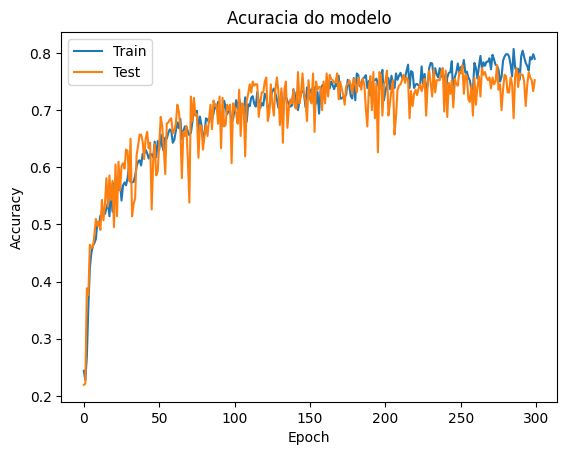

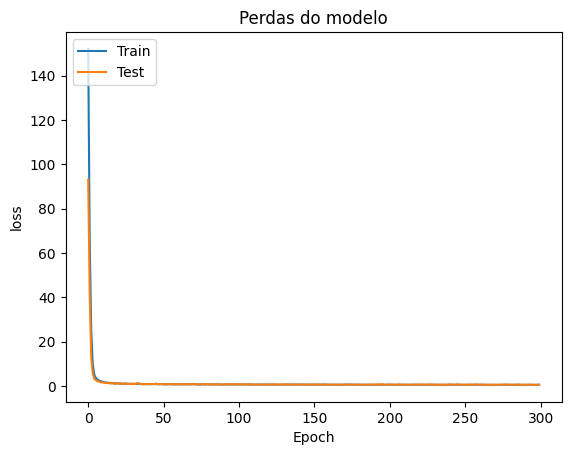

In [71]:
plot_history(history_modelo_3)

In [73]:
modelo_3.evaluate(entrada_val,target_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4922 


[0.5387769937515259, 0.7523809671401978]

In [75]:
predicao_modelo_3 = modelo_3.predict(entrada_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [77]:
# Convert predictions to class labels
predicted_labels = np.argmax(predicao_modelo_3, axis=1)

# Calculate accuracy
accuracy_modelo_3 = accuracy_score(target_teste, predicted_labels)


# Compare predicted labels with true labels
correct_predictions_modelo_3 = np.sum(predicted_labels == target_teste)
incorrect_predictions_modelo_3 = len(target_teste) - correct_predictions

print(f"Accuracy: {accuracy_modelo_3}")
print(f"Correct predictions: {correct_predictions_modelo_3}")
print(f"Incorrect predictions: {incorrect_predictions_modelo_3}")

Accuracy: 0.7516666666666667
Correct predictions: 451
Incorrect predictions: 289


In [84]:
dicionario_resultados = {'Modelo 2':[incorrect_predictions_modelo_2,correct_predictions_modelo_2,accuracy_modelo_2],
                         'Modelo 1':[incorrect_predictions, correct_predictions,accuracy],
                         'Modelo 3':[incorrect_predictions_modelo_3, correct_predictions_modelo_3,accuracy_modelo_3]}

In [85]:
df_comparando_modelos_v2 = pd.DataFrame(dicionario_resultados,index=['Erros','Acertos','Acuracia'])

In [86]:
df_comparando_modelos_v2

,Modelo 2,Modelo 1,Modelo 3
Erros,289.000000,289.000000,289.000000
Acertos,167.000000,311.000000,451.000000
Acuracia,0.278333,0.518333,0.751667


Evitando Overfitting

In [93]:
modelo_4 = criar_modelo()
modelo_5 = criar_modelo()
modelo_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
modelo_5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
from tensorflow.keras.callbacks import EarlyStopping


callback_es = EarlyStopping(monitor='loss',patience=10)

In [95]:
history_modelo_4 = modelo_4.fit(entrada_train,target_train,epochs=700,validation_data=(entrada_val,target_val),callbacks=[callback_es])

Epoch 1/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2703 - loss: 275.8808 - val_accuracy: 0.3524 - val_loss: 136.7318
Epoch 2/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2651 - loss: 105.7555 - val_accuracy: 0.3262 - val_loss: 16.8016
Epoch 3/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3453 - loss: 10.1971 - val_accuracy: 0.4119 - val_loss: 1.9871
Epoch 4/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3981 - loss: 1.5795 - val_accuracy: 0.4048 - val_loss: 1.3982
Epoch 5/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4234 - loss: 1.2116 - val_accuracy: 0.4214 - val_loss: 1.2732
Epoch 6/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4221 - loss: 1.1936 - val_accuracy: 0.4333 - val_loss: 1.2793
Epoch 7/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4185 - loss: 1.2086 - val_accuracy: 0.4286 - val_loss: 1.1912
Epoch 8/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4363 - loss: 1.1747 - val_accuracy: 0

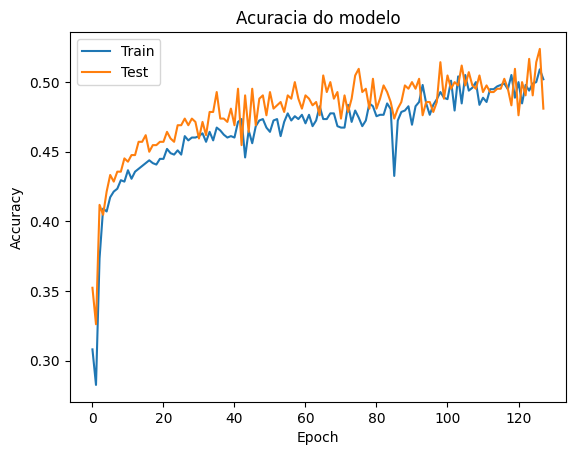

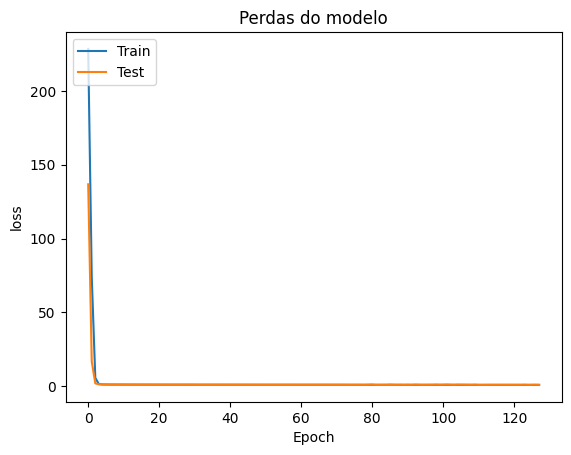

In [96]:
  plot_history(history_modelo_4)

In [97]:
modelo_4.evaluate(entrada_val,target_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4590 - loss: 1.0054


[1.0035077333450317, 0.4809523820877075]

In [108]:
predicao_modelo_4 = modelo_4.predict(entrada_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [109]:
# Convert predictions to class labels
predicted_labels = np.argmax(predicao_modelo_4, axis=1)

# Calculate accuracy
accuracy_modelo_4 = accuracy_score(target_teste, predicted_labels)


# Compare predicted labels with true labels
correct_predictions_modelo_4 = np.sum(predicted_labels == target_teste)
incorrect_predictions_modelo_4 = len(target_teste) - correct_predictions

print(f"Accuracy: {accuracy_modelo_4}")
print(f"Correct predictions: {correct_predictions_modelo_4}")
print(f"Incorrect predictions: {incorrect_predictions_modelo_4}")

Accuracy: 0.46166666666666667
Correct predictions: 277
Incorrect predictions: 289


In [110]:
dicionario_resultados = {'Modelo 2':[incorrect_predictions_modelo_2,correct_predictions_modelo_2,accuracy_modelo_2],
                         'Modelo 1':[incorrect_predictions, correct_predictions,accuracy],
                         'Modelo 3':[incorrect_predictions_modelo_3, correct_predictions_modelo_3,accuracy_modelo_3],
                         'Modelo 4':[incorrect_predictions_modelo_4, correct_predictions_modelo_4,accuracy_modelo_4]}

In [111]:
df_comparando_modelos_v3 = pd.DataFrame(dicionario_resultados,index=['Erros','Acertos','Acuracia'])
df_comparando_modelos_v3

,Modelo 2,Modelo 1,Modelo 3,Modelo 4
Erros,289.000000,289.000000,289.000000,289.000000
Acertos,167.000000,311.000000,451.000000,277.000000
Acuracia,0.278333,0.518333,0.751667,0.461667


In [103]:
t = MinMaxScaler()
t.fit(entradas)

MinMaxScaler()

In [104]:
entrada_train_escala = t.transform(entrada_train)
entrada_teste_escala = t.transform(entrada_teste)
entrada_val_escala = t.transform(entrada_val)


In [105]:
history_modelo_5 = modelo_5.fit(entrada_train_escala,target_train,epochs=700,validation_data=(entrada_val_escala,target_val),callbacks=[callback_es])

Epoch 1/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2410 - loss: 1.3889 - val_accuracy: 0.2143 - val_loss: 1.3892
Epoch 2/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2907 - loss: 1.3715 - val_accuracy: 0.2405 - val_loss: 1.3772
Epoch 3/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3112 - loss: 1.3627 - val_accuracy: 0.2667 - val_loss: 1.3596
Epoch 4/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3734 - loss: 1.3387 - val_accuracy: 0.3595 - val_loss: 1.3306
Epoch 5/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4285 - loss: 1.3060 - val_accuracy: 0.4143 - val_loss: 1.2903
Epoch 6/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4953 - loss: 1.2584 - val_accuracy: 0.4881 - val_loss: 1.2293
Epoch 7/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5342 - loss: 1.2043 - val_accuracy: 0.5333 - val_loss: 1.1558
Epoch 8/700
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5571 - loss: 1.1328 - val_accuracy: 0.6095 -

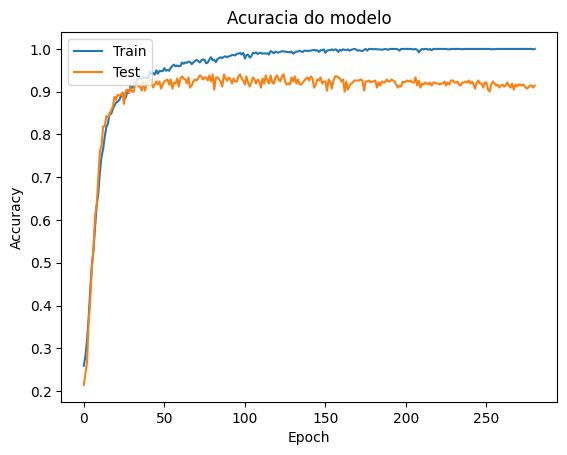

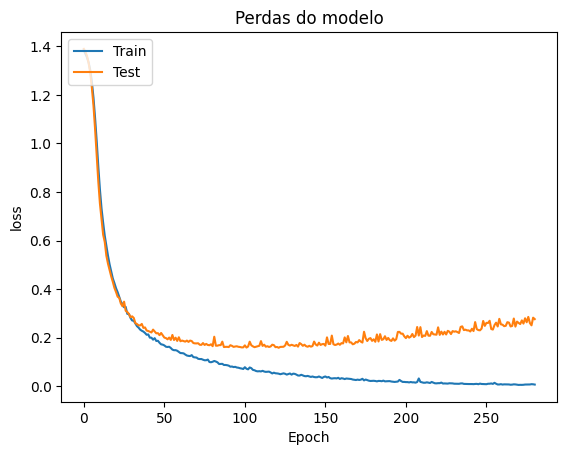

In [106]:
plot_history(history_modelo_5)

In [107]:
modelo_5.evaluate(entrada_val,target_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2840 - loss: 48895.7148


[49063.71875, 0.2547619044780731]

In [112]:
predicao_modelo_5 = modelo_5.predict(entrada_teste)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [113]:
# Convert predictions to class labels
predicted_labels = np.argmax(predicao_modelo_5, axis=1)

# Calculate accuracy
accuracy_modelo_5 = accuracy_score(target_teste, predicted_labels)


# Compare predicted labels with true labels
correct_predictions_modelo_5 = np.sum(predicted_labels == target_teste)
incorrect_predictions_modelo_5 = len(target_teste) - correct_predictions

print(f"Accuracy: {accuracy_modelo_5}")
print(f"Correct predictions: {correct_predictions_modelo_5}")
print(f"Incorrect predictions: {incorrect_predictions_modelo_5}")

Accuracy: 0.25833333333333336
Correct predictions: 155
Incorrect predictions: 289


In [115]:
dicionario_resultados = {'Modelo 2':[incorrect_predictions_modelo_2,correct_predictions_modelo_2,accuracy_modelo_2],
                         'Modelo 1':[incorrect_predictions, correct_predictions,accuracy],
                         'Modelo 3':[incorrect_predictions_modelo_3, correct_predictions_modelo_3,accuracy_modelo_3],
                         'Modelo 4':[incorrect_predictions_modelo_4, correct_predictions_modelo_4,accuracy_modelo_4],
                         'Modelo 5':[incorrect_predictions_modelo_5, correct_predictions_modelo_5,accuracy_modelo_5]}

Comparativo final

In [125]:
df_comparando_modelos_v4 = pd.DataFrame(dicionario_resultados,index=['Erros','Acertos','Acuracia'])
graf = [df_comparando_modelos_v4[0:2] , df_comparando_modelos_v4[2:4] ]
graf[0] , graf[1]

(         Modelo 2  Modelo 1  Modelo 3  Modelo 4  Modelo 5
 Erros       289.0     289.0     289.0     289.0     289.0
 Acertos     167.0     311.0     451.0     277.0     155.0,
           Modelo 2  Modelo 1  Modelo 3  Modelo 4  Modelo 5
 Acuracia  0.278333  0.518333  0.751667  0.461667  0.258333)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

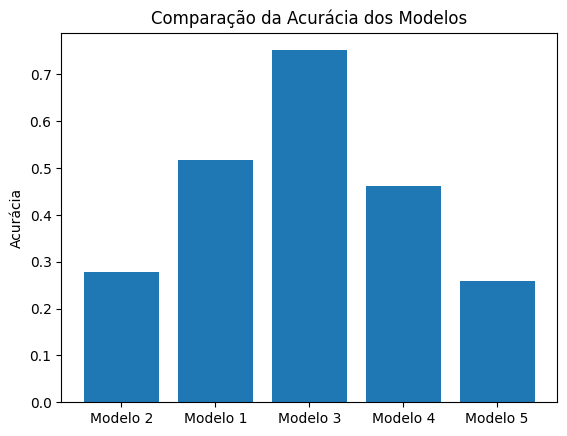

In [126]:
plt.bar(df_comparando_modelos_v4.columns, df_comparando_modelos_v4.loc['Acuracia'])
plt.title('Comparação da Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt
